**Simple Linear Regression**

*Our dataset comprises of two variables. One variable represents the number of the hours the students studied and the other one represents the percentage of marks they obtained. Our task is to check if there is a relationship between the two variable and can we predict one variable given the other one.*

*Let's get started!* 

In [39]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [41]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [42]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


*The above information states that there is no missing value in our dataset. So we are good to start our analysis without modifying our dataset.*

In [43]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


*First, We checked the correlation between the two variables and the correlation of 97.62 states that there is a significant positive relationship between the two variables.*

In [44]:
import seaborn as sns

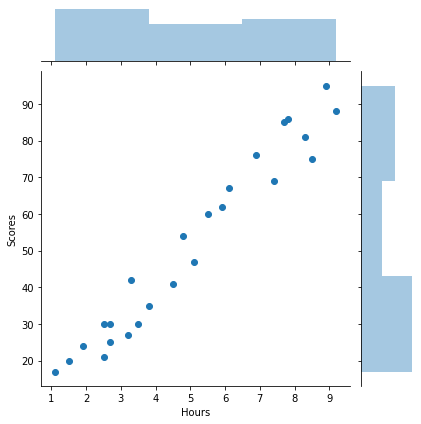

In [45]:
sns.jointplot(s_data['Hours' ],s_data['Scores'])

*The above graph also confirms the significant positve linear relationship between the two variables. The below graphs also confirm the same.*

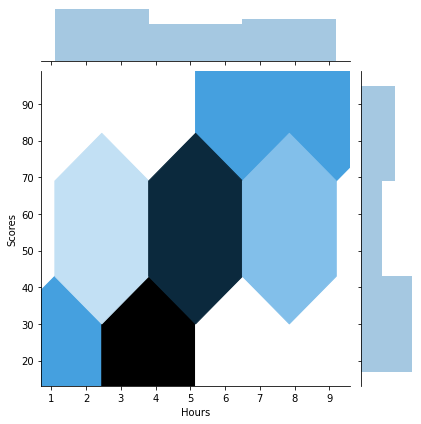

In [46]:
sns.jointplot(s_data['Hours'],s_data['Scores'],kind='hex')

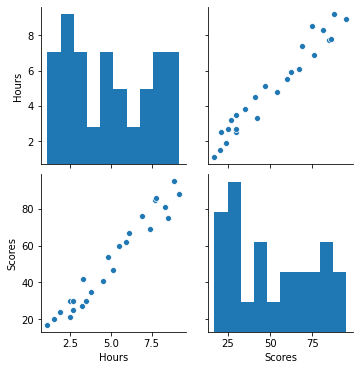

In [47]:
sns.pairplot(s_data)

*Now, we have enough evidences that we can predict one variable given the other one. So, let's start preparing out data for modelling.*

**Preparing data for modelling**

In [48]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Applying Linear Regression using Statsmodels**

In [58]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [59]:
results = model.fit()
results.params

array([2.10249307, 9.96651548])

In [60]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     428.9
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.90e-12
Time:                        14:37:13   Log-Likelihood:                -51.027
No. Observations:                  17   AIC:                             106.1
Df Residuals:                      15   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1025      2.637      0.797      0.4

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))




*   *R-squared value: It is the percentage of the response variable variation that is explained by a linear model and our model explains 96.6% of the variation which is a very good score.*
*   *AIC & BIC : These two measures provide means for model selection. The lower the value of these measures, the better the model. Our model got excellent AIC and BIC scores.*

*Please visit https://desktop.arcgis.com/en/arcmap/latest/tools/spatial-statistics-toolbox/interpreting-ols-results.htm for interpreting the results of the other parameters.*



In [75]:
X_test = sm.add_constant(X_test)

In [76]:
y_pred = results.predict(X_test)

In [77]:
residual = y_test - y_pred

**Now that we have completed our model. Let's check if all our assumptions for linear regression are true or not.**

**Assumption 1: The relationship between the dependent variable and the independent variable should be linear, and we have already proved it above.**

**Assumption 2: Durbin-Watson value is very close to 2.0 stating that there is no / very less autocorelation between the residuals.**

**Assumption 3: No need to check Multi-colinearity as there is only one independent variable.**

**Assumption 4: The residuals should be normally distributed.**

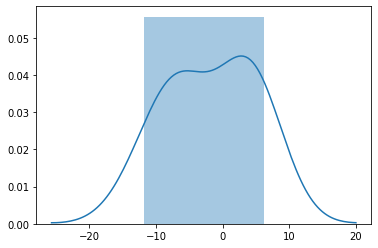

In [64]:
sns.distplot(residual)

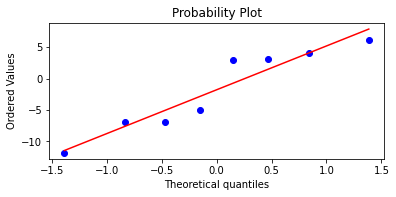

In [33]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [34]:
np.mean(residual)

-1.795839548263336

**5th Assumption : Homoscedasticity**

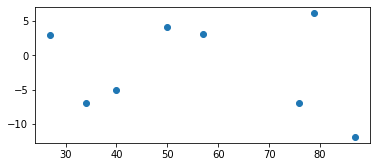

In [35]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

In [71]:
residual = np.array(residual)

**Now that all our assumptions have met, we are good to go. Let's predict the percentage of marks given the hours studied by students**

In [119]:
user_input = float(input("Enter the number of Hours:\n"))
Hours = [[1.,user_input]]
print("Predicted percentage of marks = {}".format(round(results.predict(Hours)[0],2)))

Enter the number of Hours:
9.25
Predicted percentage of marks = 94.29
